In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [3]:
# create a quantum register of 1 qbit
q = QuantumRegister(1)

In [4]:
# create one classicar register of 1 bit
c = ClassicalRegister(1)

In [5]:
# takes as input the quantum and classical register
qc = QuantumCircuit(q,c)

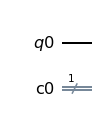

In [6]:
qc.draw("mpl") # matplotlib form

In [7]:
from qiskit.quantum_info import Statevector

## Initial State: 
The quantum circuit is initialized at the ground state, so it is expected for the quantum state to be ground state |0>. 

In [8]:
# extract information from the post-measurement state
psil = Statevector(qc)
psil.draw("latex")

<IPython.core.display.Latex object>

### Block Sphere:

In [9]:
from qiskit.visualization import plot_state_qsphere

The colormap represents the relative phase of the state:

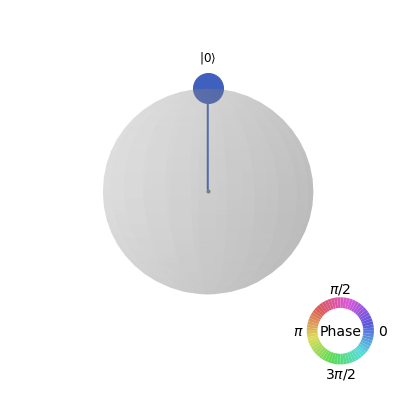

In [10]:
plot_state_qsphere(qc)

### Density Matrix

In [11]:
from qiskit.quantum_info import DensityMatrix

In [12]:
rho_1 = DensityMatrix(qc)
rho_1.draw("latex",prefix = "\\rho_1 = ")

<IPython.core.display.Latex object>

#### Density Matrix Visualization:

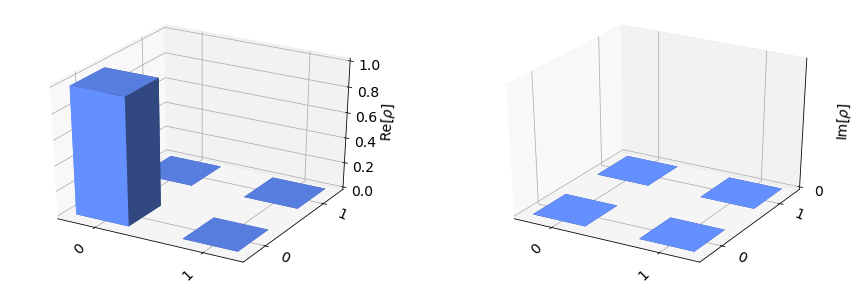

In [13]:
from qiskit.visualization import plot_state_city
plot_state_city(qc)

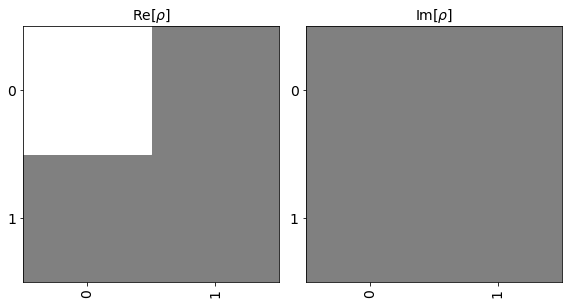

In [14]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(qc)

#### Rewrite the quantum state into a lineal combination of pauli gates:

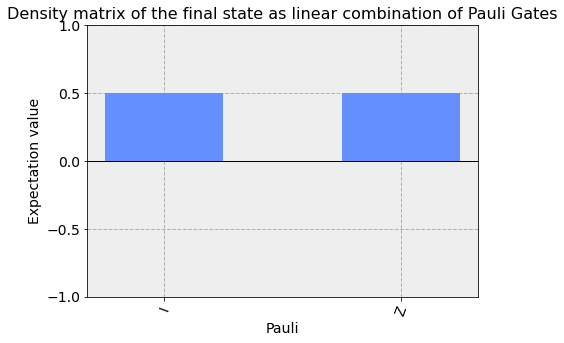

In [15]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(qc,title = "Density matrix of the final state as linear combination of Pauli Gates")

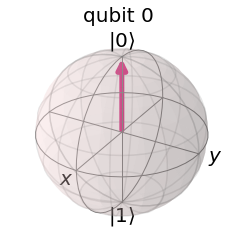

In [16]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)

### Calculate the Purity:

In [17]:
purity = rho_1.purity()
print(purity)

(1+0j)


This quantum state is pure.

### Apply a quantum gate:

In [18]:
from math import pi

In [19]:
# apply identity gate on the qbit 0
qc.ry(pi/3,q[0])

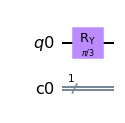

In [20]:
qc.draw('mpl')

The x gate flips the cubit state to |1>

In [21]:
psi_2 = Statevector(qc)
psi_2.draw('latex')

<IPython.core.display.Latex object>

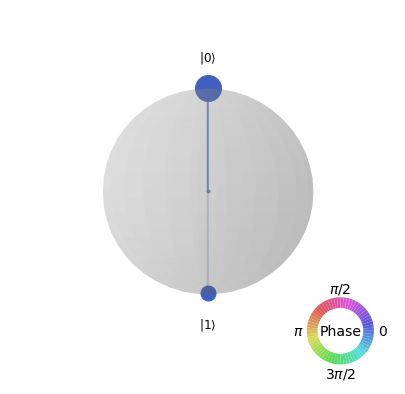

In [22]:
plot_state_qsphere(qc)

In [23]:
rho_2 = DensityMatrix(qc)
rho_2.draw('latex',prefix = 'rho_2 = ')

<IPython.core.display.Latex object>

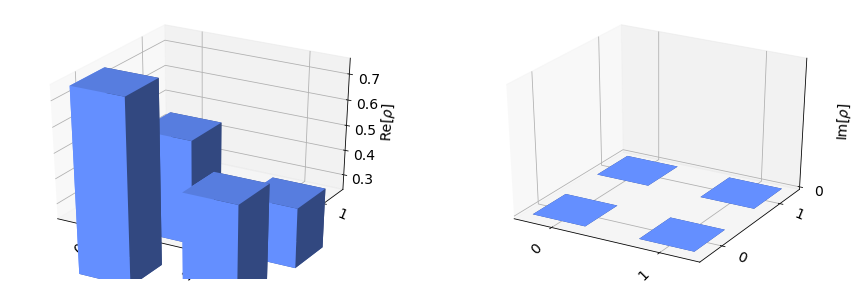

In [24]:
plot_state_city(qc)

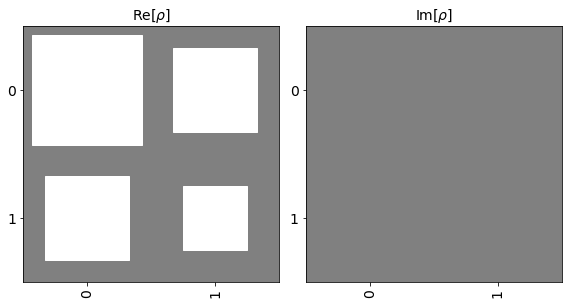

In [25]:
plot_state_hinton(qc)

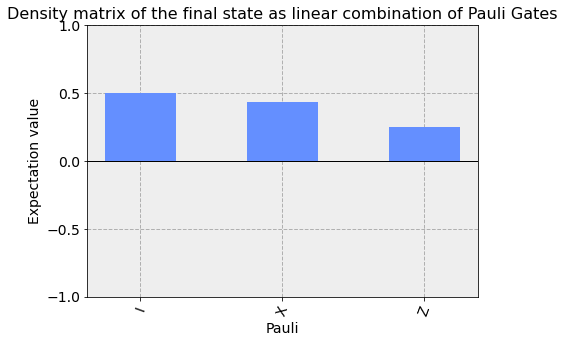

In [26]:
plot_state_paulivec(qc,title = "Density matrix of the final state as linear combination of Pauli Gates")

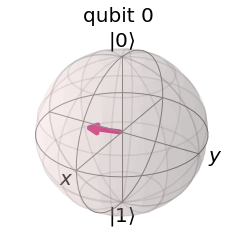

In [27]:
plot_bloch_multivector(qc)

In [28]:
purity_f = rho_2.purity()
print(purity_f)

(1.0000000000000002+0j)


### Fidelity of the vector:

In [29]:
from qiskit.quantum_info import state_fidelity

In [30]:
fidelity = state_fidelity(psil,psi_2)
print(fidelity)

0.7500000000000001


In [31]:
fidelity = state_fidelity(rho_1,rho_2)
print(fidelity)

0.7500000000000003


## Make a measurement:

In [32]:
qc.measure(q[0],c[0])

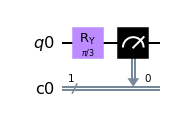

In [33]:
qc.draw('mpl')

## Ideal quantum computing

In [34]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 242, '0': 782}


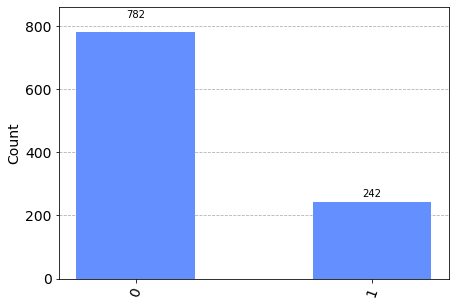

In [35]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)